In [102]:
import os
import soundfile as sf
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [103]:
soundfiles_path = './notebook/'
command_folders = {command : soundfiles_path + command for command in os.listdir(soundfiles_path)}
individual_commands_folders = {}

for command, command_folder in command_folders.items():
    files = os.listdir(command_folder)
    file_paths = []
    for file in files:
        #file_paths = [f'{command_folder}/{file}' for file in files ]
        numbers = set('1234567890')
        symbols_in_file = set(file)
        numbers_in_filename = set.intersection(numbers, symbols_in_file)

        if not numbers_in_filename:
            continue

        file_path = f'{command_folder}/{file}'
        file_paths.append(file_path)

    individual_commands_folders[command] = file_paths

print(command_folders)
print(individual_commands_folders) 

{'Вверх': './notebook/Вверх', 'Вниз': './notebook/Вниз', 'Вперёд': './notebook/Вперёд', 'Назад': './notebook/Назад', 'Налево': './notebook/Налево', 'Направо': './notebook/Направо', 'Осмотреться': './notebook/Осмотреться', 'Разворот': './notebook/Разворот', 'Сканировать': './notebook/Сканировать', 'Стоп': './notebook/Стоп', 'Увеличить': './notebook/Увеличить', 'Уменьшить': './notebook/Уменьшить'}
{'Вверх': ['./notebook/Вверх/Вверх1.wav', './notebook/Вверх/Вверх10.wav', './notebook/Вверх/Вверх2.wav', './notebook/Вверх/Вверх3.wav', './notebook/Вверх/Вверх4.wav', './notebook/Вверх/Вверх5.wav', './notebook/Вверх/Вверх6.wav', './notebook/Вверх/Вверх7.wav', './notebook/Вверх/Вверх8.wav', './notebook/Вверх/Вверх9.wav'], 'Вниз': ['./notebook/Вниз/Вниз1.wav', './notebook/Вниз/Вниз10.wav', './notebook/Вниз/Вниз2.wav', './notebook/Вниз/Вниз3.wav', './notebook/Вниз/Вниз4.wav', './notebook/Вниз/Вниз5.wav', './notebook/Вниз/Вниз6.wav', './notebook/Вниз/Вниз7.wav', './notebook/Вниз/Вниз8.wav', './note

In [104]:
def calc_mfcc(file_name, intersection = 0.5, frame_time = 10e-3):
    data, sr = sf.read(file_name)

    frame_width = round(sr * frame_time)
    hop_length = round(frame_width * intersection)

    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc = 1, hop_length = hop_length, win_length = frame_width)
    return mfcc

targets = []
x = []
x_avg = []
for target, paths_list in individual_commands_folders.items():

    for x_path in paths_list:
        x_mfcc = calc_mfcc(x_path)

        targets.append(target)
        x.append(x_mfcc.flatten())
        x_avg.append(np.mean(x_mfcc, axis=1))

print(targets)
print(x[0].shape)

['Вверх', 'Вверх', 'Вверх', 'Вверх', 'Вверх', 'Вверх', 'Вверх', 'Вверх', 'Вверх', 'Вверх', 'Вниз', 'Вниз', 'Вниз', 'Вниз', 'Вниз', 'Вниз', 'Вниз', 'Вниз', 'Вниз', 'Вниз', 'Вперёд', 'Вперёд', 'Вперёд', 'Вперёд', 'Вперёд', 'Вперёд', 'Вперёд', 'Вперёд', 'Вперёд', 'Вперёд', 'Назад', 'Назад', 'Назад', 'Назад', 'Назад', 'Назад', 'Назад', 'Назад', 'Назад', 'Назад', 'Налево', 'Налево', 'Налево', 'Налево', 'Налево', 'Налево', 'Налево', 'Налево', 'Налево', 'Налево', 'Направо', 'Направо', 'Направо', 'Направо', 'Направо', 'Направо', 'Направо', 'Направо', 'Направо', 'Направо', 'Осмотреться', 'Осмотреться', 'Осмотреться', 'Осмотреться', 'Осмотреться', 'Осмотреться', 'Осмотреться', 'Осмотреться', 'Осмотреться', 'Осмотреться', 'Разворот', 'Разворот', 'Разворот', 'Разворот', 'Разворот', 'Разворот', 'Разворот', 'Разворот', 'Разворот', 'Разворот', 'Сканировать', 'Сканировать', 'Сканировать', 'Сканировать', 'Сканировать', 'Сканировать', 'Сканировать', 'Сканировать', 'Сканировать', 'Сканировать', 'Стоп', '

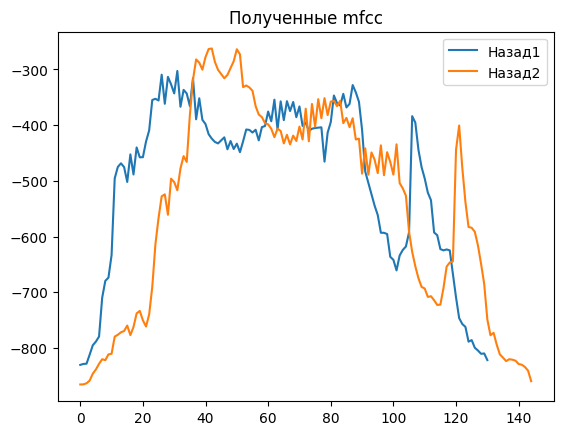

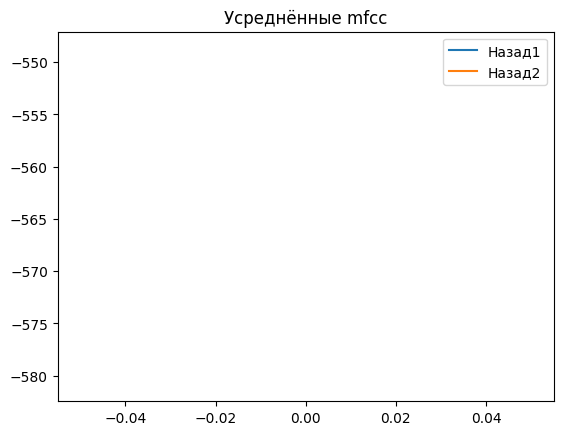

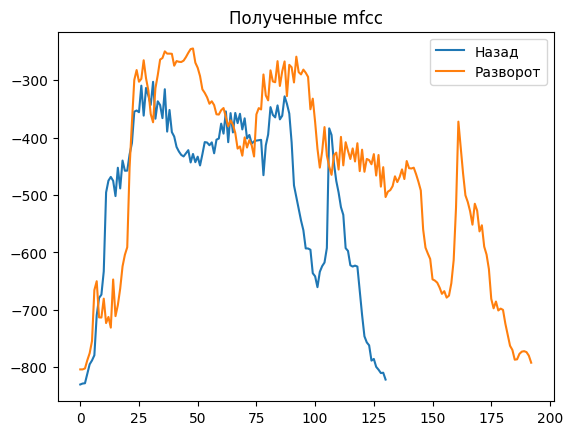

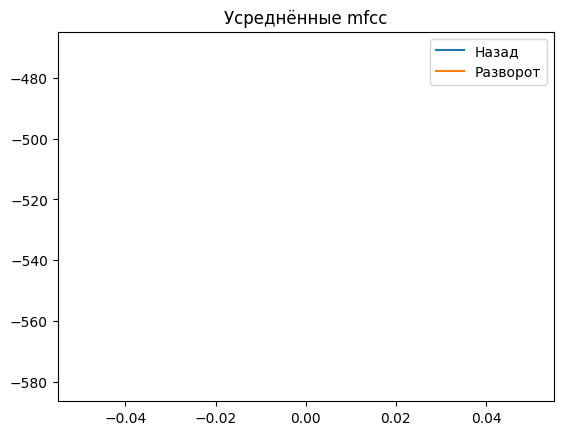

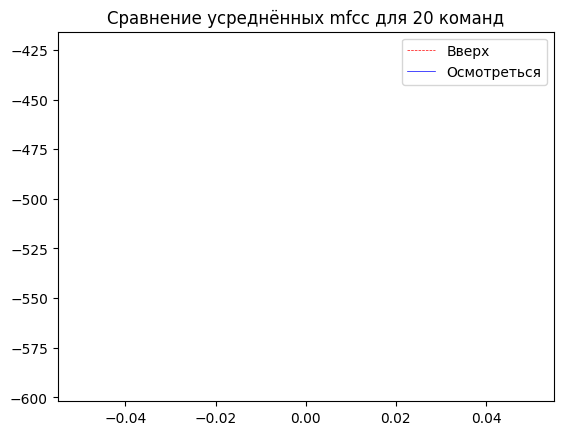

In [105]:
back1 = x[34]
back2 = x[35]
plt.plot(back1, label='Назад1')
plt.plot(back2, label='Назад2')
plt.legend()
plt.title('Полученные mfcc')
plt.show()

back1_avg = x_avg[33]
back2_avg = x_avg[35]
plt.plot(back1_avg, label='Назад1')
plt.plot(back2_avg, label='Назад2')
plt.legend()
plt.title('Усреднённые mfcc')
plt.show()

around = x[75]
plt.plot(back1, label='Назад')
plt.plot(around, label='Разворот')
plt.legend()
plt.title('Полученные mfcc')
plt.show()

around_avg = x_avg[75]
plt.plot(back1_avg, label='Назад')
plt.plot(around_avg, label='Разворот')
plt.legend()
plt.title('Усреднённые mfcc')
plt.show()

for i, target in enumerate(targets):
    if not(target == 'Вверх' or target == 'Осмотреться'):
        continue
    
    if target == 'Вверх':
        color = 'r--'
    else:
        color = 'b'
    x_data = x_avg[i]
    if i % 10 == 0:
        plt.plot(x_data, color, label=target, linewidth=0.5)
    else:
        plt.plot(x_data, color, linewidth=0.5)
plt.legend()
plt.title('Сравнение усреднённых mfcc для 20 команд')
plt.show()

c:\Users\smoll_zoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1056
  warnings.warn(


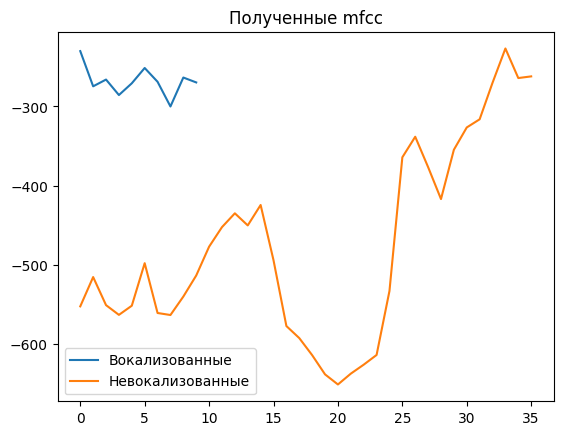

In [106]:
vowel_path = './vowel_scan1.wav'
consonant_path = './consonant_scan1.wav'

vowel_mfcc = calc_mfcc(vowel_path).flatten()
consonant_mfcc = calc_mfcc(consonant_path).flatten()

plt.plot(vowel_mfcc, label='Вокализованные')
plt.plot(consonant_mfcc, label='Невокализованные')
plt.legend()
plt.title('Полученные mfcc')
plt.show()

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from fastdtw import fastdtw

In [109]:
max_len = 0
for x_elem in x:
    cur_len = len(x_elem)
    if cur_len > max_len:
        max_len = cur_len

x_unified = []
for x_elem in x:
    need_zeros = max_len - len(x_elem)
    if need_zeros:
        x_unified.append(np.pad(x_elem, (0, need_zeros), mode='constant'))
    else:
        x_unified.append(x_elem)
x_train, x_test, y_train, y_test = train_test_split(x_unified, targets, test_size=0.3, random_state=42)


def dtw_metric(x, y):
    return fastdtw(x, y)[0]   

knn = KNeighborsClassifier(n_neighbors=3, metric=dtw_metric)
knn.fit(x_train, y_train)
accuracy = knn.score(x_test, y_test)
print(accuracy)

0.8333333333333334


In [110]:
vector = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Дополняем нулями до длины 100
padded_vector = np.pad(vector, (0, 90), mode='constant')
print(padded_vector)

[ 1  2  3  4  5  6  7  8  9 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]
